Assignment 2:



> Name: SUMANTH WANNUR




Note: 


1.   Question 1 requires Massachusetts median household income dataset, hence use the csv attached with the ipynb file.
The csv file attached is already cleaned($ sign, commas etc.,) and readily consumable for the computations.
2.   The functions for question 3,4,5 will use another recursive function for execution. Hence all the functions except main needs to be present for unit testing.










# Problem 1

In [ ]:
#Q1: Calculation of histogram and boxplot of median household income of Massachusetts
#import statements
import pandas as pd
import numpy as np
#Import data file & modules
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from ast import Raise
import seaborn as sns
import matplotlib.pyplot as plt

print("Upload csv file for Massachusetts median household income.")
uploaded = files.upload()
for i in uploaded.keys():
  csv_file_name = i
print("CSV = " + csv_file_name)
dataFrame_Q1A2 = pd.read_csv(csv_file_name)

Upload csv file for Massachusetts median household income.


Saving Mass_income_by_school_dataset - Sheet1.csv to Mass_income_by_school_dataset - Sheet1.csv
CSV = Mass_income_by_school_dataset - Sheet1.csv


In [ ]:
dataFrame_Q1A2 = pd.read_csv(csv_file_name)
dataFrame_Q1A2

,Rank,Median Household Income,School District,Population
0,1,201200,Weston School District,11704
1,2,176250,Dover School District,5727
2,3,169505,Sudbury School District,18197
3,4,165625,Dover-Sherborn School District,9927
4,5,159615,Wellesley School District,28858
...,...,...,...,...
304,305,34731,Springfield School District,153836
305,306,34496,Lawrence School District,77364
306,307,33763,Fall River School District,88756
307,308,32083,North Adams School District in Monroe (9-12),118


(array([0.06796117, 0.25889968, 0.29449838, 0.17152104, 0.10032362,
        0.05825243, 0.02265372, 0.01618123, 0.00647249, 0.00323625]),
 array([ 31406. ,  48385.4,  65364.8,  82344.2,  99323.6, 116303. ,
        133282.4, 150261.8, 167241.2, 184220.6, 201200. ]),
 <a list of 10 Patch objects>)

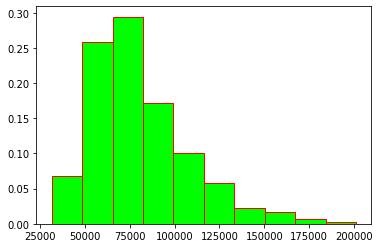

In [ ]:
rel_freq_fig = plt.figure()
canvas = rel_freq_fig.add_subplot(111)
canvas.hist(dataFrame_Q1A2['Median Household Income'], color = "lime", edgecolor = "red" ,weights=np.ones_like(dataFrame_Q1A2['Median Household Income']) / len(dataFrame_Q1A2['Median Household Income']) )
#sns.histplot(dataFrame_Q1A2, x='Median Household Income')

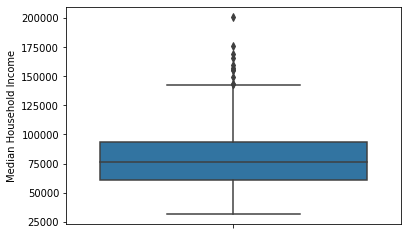

In [ ]:
sns.boxplot(data = dataFrame_Q1A2, y='Median Household Income')

# Problem 2

## Problem 2.a: COIN TOSS SAMPLE SPACE GENERATOR

In [ ]:
#Coin tossing sample space generator
#import statements
import pandas as pd
import numpy as np

In [ ]:
#function cointoss is a generic coin sample space generator for any number of n. It is limited by n_limiter variable defaulting to True. 
#set n_limiter to false while passing arguement to calculate n greater than 3
#the function needs only 1 arguement n as compulsory, rest all are optional
def cointoss(n,dfflag = True,n_limiter = True):
  if n_limiter == True and (n > 3 or n < 1):
    raise ValueError("N should be between 1 and 3")
  elif n_limiter == False and n<1:
    raise ValueError("Invalid N value!")
  sample = []
  if n == 1:
    sample = ['H','T']
  else:    
    for element in cointoss(n-1,False):
      sample.append('H'+element)
      sample.append('T'+element)
  if dfflag:
    sample_set = []
    sample_df_row = {}
    row_string = ''
    for element in sample:
      for i in range(len(element)):
        sample_df_row['toss'+str(i+1)] = element[i]
      sample_set.append(sample_df_row)
      sample_df_row = {}
    return pd.DataFrame(sample_set)
        
        
  return sample

#main function starts here
def main():
  n = input("Welcome to Coin toss sample generator. Enter number of tosses between 3 and 1:")
  n = int(n)
  #Function call happening here
  df = cointoss(n)
  print(df)

In [ ]:
if __name__ == '__main__':
  main()

## Problem 2.b: ROLLING DIE SAMPLE SPACE GENERATOR

In [ ]:
#Rolling die sample space generator
#import statements
import pandas as pd
import numpy as np

In [ ]:
#Generic function to caluculate sample space for a roll die of n rolls. limited by n_limiter as default to True
def rolldie(n,dfflag = True,n_limiter = True):
  if n_limiter == True and (n > 3 or n < 1):
    raise ValueError("N should be between 1 and 3")
  elif n_limiter == False and n<1:
    raise ValueError("Invalid N value!")
  sample = []
  if n == 1:
    sample = ['1','2','3','4','5','6']
  else:    
    for element in rolldie(n-1,False):
      for i in range(1,7):
        sample.append(str(i)+element)
  if dfflag:
    sample_set = []
    sample_df_row = {}
    row_string = ''
    for element in sample:
      for i in range(len(element)):
        sample_df_row['X'+str(i+1)] = element[i]
      sample_set.append(sample_df_row)
      sample_df_row = {}
    return pd.DataFrame(sample_set)
        
        
  return sample

#main function starts here
def main():
  n = input("Welcome to Rolling die sample generator. Enter number of tosses between 3 and 1:")
  n = int(n)
  df = rolldie(n)
  print(df)

In [ ]:
if __name__ == '__main__':
  main()

# Problem 3: Coin tossing/Rolling die sample space & probability generator

In [ ]:
#Coin tossing/Rolling die sample space & probability generator
#import statements
import pandas as pd
import numpy as np

In [ ]:
def cointoss(n,dfflag = True):
  if n > 3 or n < 1:
    raise ValueError("N should be between 1 and 3")
  sample = []
  if n == 1:
    sample = ['H','T']
  else:    
    for element in cointoss(n-1,False):
      sample.append('H'+element)
      sample.append('T'+element)
  if dfflag:
    sample_set = []
    sample_df_row = {}
    row_string = ''
    for element in sample:
      for i in range(len(element)):
        sample_df_row['toss'+str(i+1)] = element[i]
      sample_set.append(sample_df_row)
      sample_df_row = {}
    return pd.DataFrame(sample_set)
        
        
  return sample

def rolldie(n,dfflag = True):
  if n > 3 or n < 1:
    raise ValueError("N should be between 1 and 3")
  sample = []
  if n == 1:
    sample = ['1','2','3','4','5','6']
  else:    
    for element in rolldie(n-1,False):
      for i in range(1,7):
        sample.append(str(i)+element)
  if dfflag:
    sample_set = []
    sample_df_row = {}
    row_string = ''
    for element in sample:
      for i in range(len(element)):
        sample_df_row['X'+str(i+1)] = element[i]
      sample_set.append(sample_df_row)
      sample_df_row = {}
    return pd.DataFrame(sample_set)
        
        
  return sample

#ProbSpace Function internally calls above functions
#eventtype is a string, n is integer
def probspace(event_type,n):
  if event_type == 'rolldie' or (event_type.replace(' ','')).lower() == 'rolldie':
    df = rolldie(n)
  elif event_type == 'cointoss'or (event_type.replace(' ','')).lower() == 'rolldie':
    df = cointoss(n)
  else:
    raise ValueError("Function not found for " + event_type)
  df = df.assign(probs=(1/(len(df.index))))
  return df

#main function starts here
def main():
  Event_Mapper = {1:'Coin toss', 2:'Roll die'}
  print("Welcome to sample and probability generator. Select from following event type:")
  for key in Event_Mapper:
    print(str(key) + " - " + Event_Mapper[key])
  eventtype = input("Enter option: ")
  try:
    eventtype = int(eventtype)
  except:
    raise ValueError("Invalid input for Event type!")
  if eventtype not in Event_Mapper.keys():
    raise ValueError("Invalid input for Event type!")
  

  n = input("Enter number of " + Event_Mapper[eventtype] + "s: ")
  n = int(n)
  df = probspace(Event_Mapper[eventtype],n)
  print(df)

In [ ]:
if __name__ == '__main__':
  main()

# Problem 4: SAMPLE SPACE GENERATOR FOR SELECTING 'R' OBJECTS OUT OF 'N' OBJECTS

In [ ]:
#import statements
import pandas as pd
import numpy as np

In [ ]:
from os import replace

#Function <sample> uses <simulator> function internally
def sample(n,r,order,replacement):
  objects = list(range(1,n+1))
  print_extras = True
  if (r == 0 or r > len(objects)):
    raise ValueError("Invalid input for number of items to be drawn!")
  #for i in range(len(objects)):
  #  objects[i] = str(objects[i])
  simulation_tray = []
  if print_extras == True:
    if order == True:
      print("Permutation with")
    else:
      print("Combination with")
    if replacement == True:
      print("replacement")
    else:
      print("No replacement")
  simulation_tray = simulator(objects,r,order,replacement)
  column = []
  for i in range(r):
    column.append("X"+str(i+1))
  
  df = pd.DataFrame(simulation_tray, columns = column)
  return df

#Generic simulator function for r object retrieval in n object space
def simulator(objects,r,order,replacement):
  
  if r == 1 and order == True:
    return objects
  if (r == 0 or r > len(objects)) and order == True:
    raise ValueError("Invalid input for number of items to be drawn!")
  
  else:
    if r == 0:
      return [[]]
    temp_objects = []
    samp = []
    for element in objects:
      
      if order == True:
        temp_objects = objects[:]
        temp_objects.remove(element)
        if replacement == False:
          #simulating without replacement permutation
          for element_2 in simulator(temp_objects,r-1,order,replacement):
            if type(element_2) == list:
              samp.append([element] + element_2)
            else:
              samp.append([element] + [element_2])          
        else:
          #simuating with replacement permutation
          for element_2 in simulator(objects,r-1,order,replacement):
            if type(element_2) == list:
              samp.append([element]+element_2)
            else:
              samp.append([element] + [element_2])
      else:
        temp_objects = objects[:]
        
        if replacement == False:
          #simulating without replacement combination
          temp_objects = temp_objects[temp_objects.index(element)+1:]
          
          for element_2 in simulator(temp_objects,r-1,order,replacement):
            if type(element_2) == list:
              samp.append([element]+element_2)
            else:
              samp.append([element] + [element_2])
               
        else:
          #simuating with replacement combination
          temp_objects = temp_objects[temp_objects.index(element):]
          for element_2 in simulator(temp_objects,r-1,order,replacement):
            if type(element_2) == list:
              samp.append([element]+element_2)
            else:
              samp.append([element] + [element_2])
        
    return samp

#Main function starts here
def main():
  options = {1:{'name':'Permutation with replacement','order' : True, 'replacement' : True},
             2:{'name':'Permutation without replacement','order' : True, 'replacement' : False},
             3:{'name':'Combination with replacement','order' : False, 'replacement' : True},
             4:{'name':'Combination without replacement', 'order' : False, 'replacement' : False}}                
  print("Welcome to Permutation/Combination simulator. Below are the options for selection:")
  for key in options.keys():
    print(""+str(key)+"-"+options[key]['name']+" (Order="+str(options[key]['order'])+", replacement="+str(options[key]['replacement'])+")")
  print("Enter input as option, N and R seperated by spaces: Ex: (Incase of Permutation with replacement of 10 objects with 3 objects selected input will be: 1 10 3")
  inp = input()
  inp = inp.split(" ")
  #input handling
  for i in range(len(inp)):    
    try:
      inp[i] = int(inp[i])
    except:
      raise ValueError("Entered invalid option!")
  if inp[0] not in [1,2,3,4]:
    raise ValueError("Entered invalid option!")

  df1 = sample(inp[1],inp[2],options[inp[0]]['order'],options[inp[0]]['replacement'])
  print(df1)

In [ ]:
if __name__ == '__main__':
  main()

# Problem 5: NUMBER OF SAMPLE SPACE GENERATOR FOR 'R' OBJECTS DRAWN OUT OF 'N' OBJECTS

In [ ]:
#Dynamic programming approach for n fact generation. Hence declaring global dictionary for n fact
global_dict = {}

#Generic function for factorial generation
def fact_n(n):
  if n in global_dict.keys():
    return global_dict[n]
  if n == 0:
    global_dict[0] = 1    
  else:
    fac = n * fact_n(n-1)
    global_dict[n] = fac
  return global_dict[n]

#Function definition. This internally uses dact_n function
def nsample(n,r,order,replacement):
  if order == True:
    #Permutation block
    if replacement == True:
      return n**r
    else:
      return fact_n(n)/(fact_n(n-r))
  else:
    #Combination block
    if replacement == False:
      return fact_n(n)/(fact_n(r)*fact_n(n-r))
    else:
      return fact_n(r+n-1)/(fact_n(r)*fact_n(n-1))

#main function starts here
def main():
  options = {1:{'name':'Permutation with replacement','order' : True, 'replacement' : True},
             2:{'name':'Permutation without replacement','order' : True, 'replacement' : False},
             3:{'name':'Combination with replacement','order' : False, 'replacement' : True},
             4:{'name':'Combination without replacement', 'order' : False, 'replacement' : False}}                
  print("Welcome to Permutation/Combination outcome simulator. Below are the options for selection:")
  for key in options.keys():
    print(""+str(key)+"-"+options[key]['name']+" (Order="+str(options[key]['order'])+", replacement="+str(options[key]['replacement'])+")")
  print("Enter input as option, N and R seperated by spaces: Ex: (Incase of Permutation with replacement of 10 objects with 3 objects selected input will be: 1 10 3")
  inp = input()
  inp = inp.split(" ")
  for i in range(len(inp)):    
    try:
      inp[i] = int(inp[i])
    except:
      raise ValueError("Entered invalid option!")
  if inp[0] not in [1,2,3,4]:
    raise ValueError("Entered invalid option!")

  print(nsample(inp[1],inp[2],options[inp[0]]['order'],options[inp[0]]['replacement']))

In [ ]:
if __name__ == '__main__':
  main()